In [1]:
import os
import sys
import glob
import pandas as pd
import re

from astropy.io.fits.header import Header

data_folder = "/user/simon/data/soar/header_samples"

file_list = glob.glob(os.path.join(data_folder,
                                   "headers/*.txt"))

In [2]:
all_keywords = []
all_dates = []

for _file in sorted(file_list):
    _date = re.sub('-header_blue.txt', '', os.path.basename(_file))
    if _date not in all_dates:
      all_dates.append(_date)
    with open(_file, 'r') as f:
        h = Header.fromtextfile(f)
        for key in h.keys():
            if key not in all_keywords:
                all_keywords.append(key)
print(all_keywords)
print(all_dates)


['SIMPLE', 'BITPIX', 'NAXIS', 'NAXIS1', 'NAXIS2', 'NAXIS3', 'BSCALE', 'BZERO', 'DATE-OBS', 'DATE', 'TIME', 'N_PARAM', 'PARAM0', 'PARAM1', 'PARAM2', 'PARAM3', 'PARAM4', 'PARAM5', 'PARAM6', 'PARAM7', 'PARAM8', 'PARAM9', 'PARAM10', 'PARAM11', 'PARAM12', 'PARAM13', 'PARAM14', 'PARAM15', 'PARAM16', 'PARAM17', 'PARAM18', 'PARAM19', 'PARAM20', 'PARAM21', 'PARAM22', 'PARAM23', 'PARAM24', 'PARAM25', 'PARAM26', 'PARAM27', 'PARAM28', 'PARAM29', 'PARAM30', 'PARAM31', 'PARAM32', 'PARAM33', 'PARAM34', 'PARAM35', 'PARAM36', 'PARAM37', 'PARAM38', 'PARAM39', 'PARAM40', 'PARAM41', 'PARAM42', 'PARAM43', 'PARAM44', 'PARAM45', 'PARAM46', 'PARAM47', 'PARAM48', 'PARAM49', 'PARAM50', 'PARAM51', 'PARAM52', 'PARAM53', 'PARAM54', 'PARAM55', 'PARAM56', 'PARAM57', 'PARAM58', 'PARAM59', 'PARAM60', 'PARAM61', 'PARAM62', 'PARAM63', 'PARAM64', 'PARAM65', 'PARAM66', 'PARAM67', 'PARAM68', 'PARAM69', 'PARAM70', 'PARAM71', 'PARAM72', 'PARAM73', 'PARAM74', 'PARAM75', 'PARAM76', 'PARAM77', 'PARAM78', 'PARAM79', 'TELESCOP', 

In [3]:
df = pd.DataFrame(columns=all_keywords, index=all_dates)
df = df.fillna(False)
print(df)
for _file in sorted(file_list):
    _date = re.sub('-header_blue.txt', '', os.path.basename(_file))
    with open(_file, 'r') as f:
        h = Header.fromtextfile(f)
        for key in h.keys():
            df.at[_date, key] = True
print(df.to_string())
print(df.all().to_string())
# print(df[~df.all()].to_string())

                       SIMPLE  BITPIX  NAXIS  NAXIS1  NAXIS2  NAXIS3  BSCALE  \
1996-02-17-header.txt   False   False  False   False   False   False   False   
1996-02-20-header.txt   False   False  False   False   False   False   False   
1996-02-21-header.txt   False   False  False   False   False   False   False   
1996-03-01-header.txt   False   False  False   False   False   False   False   
2013-12-28-header.txt   False   False  False   False   False   False   False   
...                       ...     ...    ...     ...     ...     ...     ...   
2020-03-12-header.txt   False   False  False   False   False   False   False   
2020-03-13-header.txt   False   False  False   False   False   False   False   
2020-03-14-header.txt   False   False  False   False   False   False   False   
2020-03-15-header.txt   False   False  False   False   False   False   False   
2020-03-16-header.txt   False   False  False   False   False   False   False   

                       BZERO  DATE-OBS 

                       SIMPLE  BITPIX  NAXIS  NAXIS1  NAXIS2  NAXIS3  BSCALE  BZERO  DATE-OBS  DATE  TIME  N_PARAM  PARAM0  PARAM1  PARAM2  PARAM3  PARAM4  PARAM5  PARAM6  PARAM7  PARAM8  PARAM9  PARAM10  PARAM11  PARAM12  PARAM13  PARAM14  PARAM15  PARAM16  PARAM17  PARAM18  PARAM19  PARAM20  PARAM21  PARAM22  PARAM23  PARAM24  PARAM25  PARAM26  PARAM27  PARAM28  PARAM29  PARAM30  PARAM31  PARAM32  PARAM33  PARAM34  PARAM35  PARAM36  PARAM37  PARAM38  PARAM39  PARAM40  PARAM41  PARAM42  PARAM43  PARAM44  PARAM45  PARAM46  PARAM47  PARAM48  PARAM49  PARAM50  PARAM51  PARAM52  PARAM53  PARAM54  PARAM55  PARAM56  PARAM57  PARAM58  PARAM59  PARAM60  PARAM61  PARAM62  PARAM63  PARAM64  PARAM65  PARAM66  PARAM67  PARAM68  PARAM69  PARAM70  PARAM71  PARAM72  PARAM73  PARAM74  PARAM75  PARAM76  PARAM77  PARAM78  PARAM79  TELESCOP  INSTRUME  OBJECT  NOTES    RA   DEC  AIRMASS    UT  FOCUS  MOUNT_AZ  MOUNT_EL  ROTATOR  POSANGLE  SEEING   LST  OBSRA  OBSDEC  DOME_AZ     HA  ADCSTAT  ADCPOS  CAM_

In [4]:
for column in all_keywords:
    if df[column].all():
        df = df.drop(columns=[column])

In [5]:
pd.set_option('display.max_rows', len(df))
df

NAXIS3  N_PARAM  PARAM0  PARAM1  PARAM2  PARAM3  \
1996-02-17-header.txt    True     True    True    True    True    True   
1996-02-20-header.txt    True     True    True    True    True    True   
1996-02-21-header.txt    True     True    True    True    True    True   
1996-03-01-header.txt    True     True    True    True    True    True   
2013-12-28-header.txt    True     True    True    True    True    True   
2013-12-31-header.txt    True     True    True    True    True    True   
2014-01-03-header.txt    True     True    True    True    True    True   
2014-01-04-header.txt    True     True    True    True    True    True   
2014-01-06-header.txt    True     True    True    True    True    True   
2014-01-07-header.txt    True     True    True    True    True    True   
2014-01-09-header.txt    True     True    True    True    True    True   
2014-01-10-header.txt    True     True    True    True    True    True   
2014-01-11-header.txt    True     True    True    True    True    True   
2014-01-12-header.txt    True     True    True    True    True    True   
2014-01-13-header.txt    True     True    True    True    True    True   
2014-01-17-header.txt    True     True    True    True    True    True   
2014-01-21-header.txt    True     True    True    True    True    True   
2014-01-22-header.txt    True     True    True    True    True    True   
2014-01-27-header.txt    True     True    True    True    True    True   
2014-02-06-header.txt    True     True    True    True    True    True   
2014-02-07-header.txt    True     True    True    True    True    True   
2014-02-08-header.txt    True     True    True    True    True    True   
2014-02-09-header.txt    True     True    True    True    True    True   
2014-02-10-header.txt    True     True    True    True    True    True   
2014-02-15-header.txt    True     True    True    True    True    True   
2014-02-16-header.txt    True     True    True    True    True    True   
2014-02-17-header.txt    True     True    True    True    True    True   
2014-02-18-header.txt    True     True    True    True    True    True   
2014-02-19-header.txt    True     True    True    True    True    True   
2014-02-20-header.txt    True     True    True    True    True    True   
2014-02-21-header.txt    True     True    True    True    True    True   
2014-02-22-header.txt    True     True    True    True    True    True   
2014-02-23-header.txt    True     True    True    True    True    True   
2014-02-24-header.txt    True     True    True    True    True    True   
2014-02-25-header.txt    True     True    True    True    True    True   
2014-02-26-header.txt    True     True    True    True    True    True   
2014-03-10-header.txt    True     True    True    True    True    True   
2014-03-13-header.txt    True     True    True    True    True    True   
2014-03-14-header.txt    True     True    True    True    True    True   
2014-03-15-header.txt    True     True    True    True    True    True   
2014-03-16-header.txt    True     True    True    True    True    True   
2014-03-18-header.txt    True     True    True    True    True    True   
2014-03-19-header.txt    True     True    True    True    True    True   
2014-03-20-header.txt    True     True    True    True    True    True   
2014-03-21-header.txt    True     True    True    True    True    True   
2014-03-22-header.txt    True     True    True    True    True    True   
2014-03-23-header.txt    True     True    True    True    True    True   
2014-03-24-header.txt    True     True    True    True    True    True   
2014-03-25-header.txt    True     True    True    True    True    True   
2014-03-26-header.txt    True     True    True    True    True    True   
2014-03-27-header.txt    True     True    True    True    True    True   
2014-03-28-header.txt    True     True    True    True    True    True   
2014-03-29-header.txt    True     True    True    True    True    True   
2014-03-30-header.txt    Tr

In [6]:
for col in all_keywords:
    print(col)

SIMPLE
BITPIX
NAXIS
NAXIS1
NAXIS2
NAXIS3
BSCALE
BZERO
DATE-OBS
DATE
TIME
N_PARAM
PARAM0
PARAM1
PARAM2
PARAM3
PARAM4
PARAM5
PARAM6
PARAM7
PARAM8
PARAM9
PARAM10
PARAM11
PARAM12
PARAM13
PARAM14
PARAM15
PARAM16
PARAM17
PARAM18
PARAM19
PARAM20
PARAM21
PARAM22
PARAM23
PARAM24
PARAM25
PARAM26
PARAM27
PARAM28
PARAM29
PARAM30
PARAM31
PARAM32
PARAM33
PARAM34
PARAM35
PARAM36
PARAM37
PARAM38
PARAM39
PARAM40
PARAM41
PARAM42
PARAM43
PARAM44
PARAM45
PARAM46
PARAM47
PARAM48
PARAM49
PARAM50
PARAM51
PARAM52
PARAM53
PARAM54
PARAM55
PARAM56
PARAM57
PARAM58
PARAM59
PARAM60
PARAM61
PARAM62
PARAM63
PARAM64
PARAM65
PARAM66
PARAM67
PARAM68
PARAM69
PARAM70
PARAM71
PARAM72
PARAM73
PARAM74
PARAM75
PARAM76
PARAM77
PARAM78
PARAM79
TELESCOP
INSTRUME
OBJECT
NOTES
RA
DEC
AIRMASS
UT
FOCUS
MOUNT_AZ
MOUNT_EL
ROTATOR
POSANGLE
SEEING
LST
OBSRA
OBSDEC
DOME_AZ
HA
ADCSTAT
ADCPOS
CAM_ANG
GRT_ANG
CAM_TARG
GRT_TARG
CAM_FOC
COLL_FOC
FILTER
FILTER2
GRATING
SLIT
COL_TEMP
CAM_TEMP
EXPTIME
RDNOISE
GAIN
OBSTYPE
OBSERVER
PROPOSAL
EQUIN

In [7]:
ar = df.to_numpy()

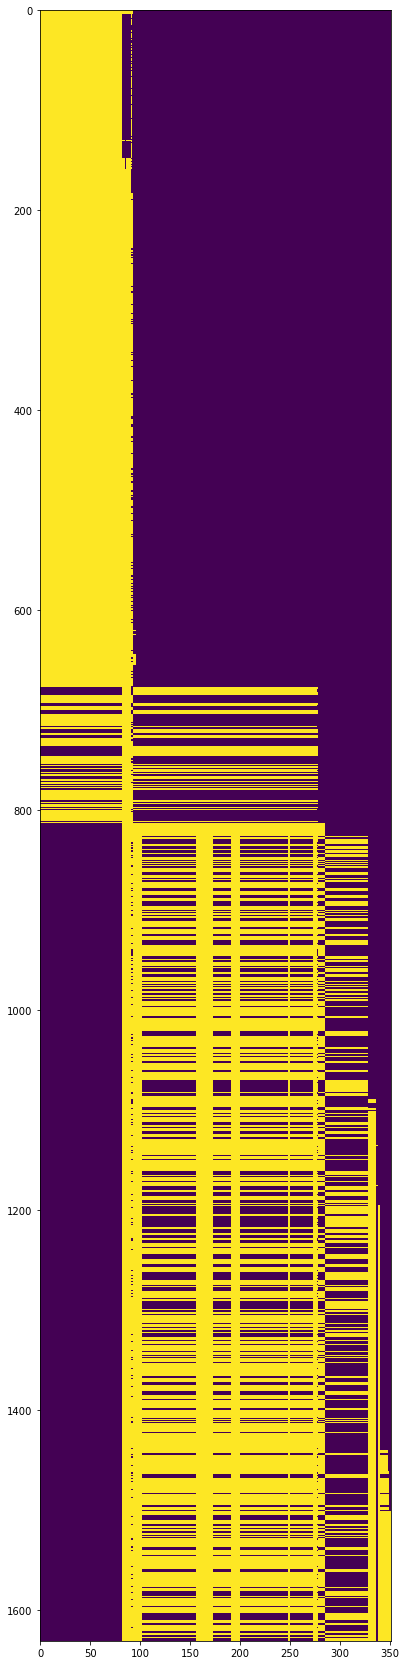

In [8]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots(figsize=(40, 30))
ax.imshow(ar)